The Chi squared distribution with $k$ degrees of freedom $\chi^2(k)$ has mean $k$. This means:

$$ E[\chi^2(k)] = k  $$

$$ E\Big[\frac{\chi^2(k)}{k}\Big] = 1 $$

$$ plim\Big(\frac{\chi^2(k)}{k}\Big) = 1 $$




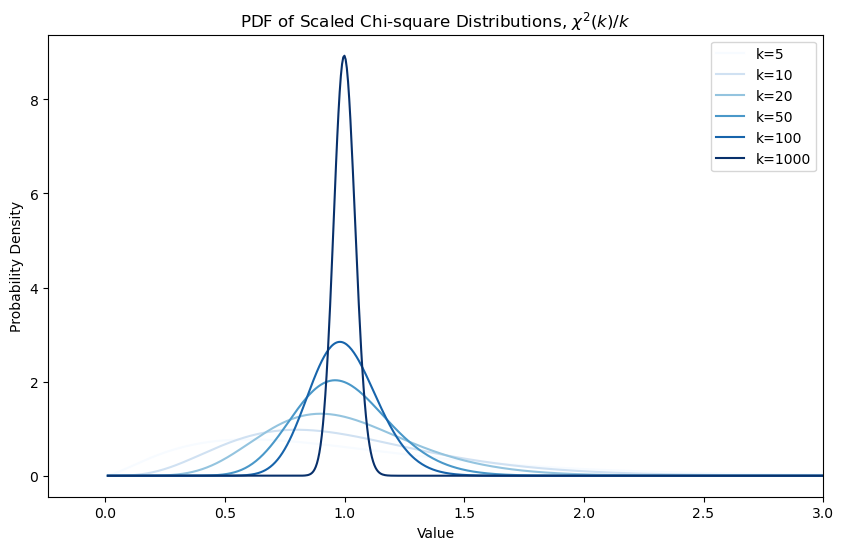

In [45]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2, f
import matplotlib.cm as cm
import matplotlib.colors as mcolors

# Generate points on the x-axis for which the PDFs will be calculated
x = np.linspace(0.01, 5, 1000)

# Plot the scaled PDFs of the Chi-squared distributions for each k
plt.figure(figsize=(10, 6))

ks = [5, 10, 20, 50, 100, 1000] 

# Create a colormap
cmap = cm.Blues 
# Create a Normalize object to map the values (indexes in this case) to the [0.0, 1.0] interval
norm = mcolors.Normalize(vmin=0, vmax=len(ks)-1)

for i, k in enumerate(ks):
    # Calculate the PDF of the chi-squared distribution scaled by k
    pdf_chi2_scaled = chi2.pdf(x * k, k) * k
    # Use the colormap to determine the color based on the loop index
    color = cmap(norm(i))
    plt.plot(x, pdf_chi2_scaled, label=f'k={k}', color=color)

# Add labels and legend to the plot
plt.title('PDF of Scaled Chi-square Distributions, $\chi^2(k)/k$')
plt.xlabel('Value')
plt.ylabel('Probability Density')
plt.legend()
plt.xlim(right =3)
# Show the plot
plt.show()


For $V_1 \sim \chi^2(k_1)$ and $V_2 \sim \chi^2(k_2)$ Chi squared random variables:

$$ F(k_1,k_2) = \frac{V_1/k_1}{V_2/k_2} \quad \text{, an $F$ random variable with $k_1, k_2$ degrees of freedom} $$

If $k_2 \to \infty$, because $ plim(\chi^2(k_2)/k_2) = 1 $, we should expect that $ F(k_1,\infty) \stackrel{\text{d}}{\to}  \chi^2(k_1)/k_1 $


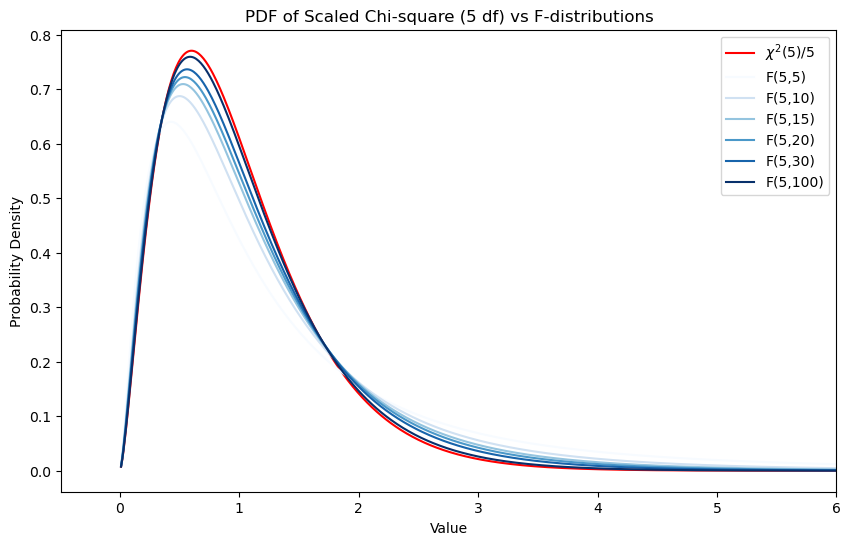

In [47]:


# Define the degrees of freedom for the chi-squared distribution and the F-distribution
df_chi2 = 5
ks = [5, 10, 15, 20, 30, 100]  # Values of k for the F-distribution

# Create a colormap
cmap = cm.Blues 
# Create a Normalize object to map the values (indexes in this case) to the [0.0, 1.0] interval
norm = mcolors.Normalize(vmin=0, vmax=len(ks)-1)

# Generate points on the x-axis for which the PDFs will be calculated
x = np.linspace(0.01, 10, 1000)

# Calculate the PDF of the chi-squared distribution
pdf_chi2 = chi2.pdf(x*df_chi2, df_chi2)*df_chi2

# Plot the PDF of the chi-squared distribution
plt.figure(figsize=(10, 6))
plt.plot(x, pdf_chi2, label='$\chi^2(5)/5$', color = 'red')

# Calculate and plot the PDFs of the F-distributions for each k
for i, k in enumerate(ks):
    # Calculate the PDF
    pdf_f = f.pdf(x, df_chi2, k)
    
    color = cmap(norm(i))
    plt.plot(x, pdf_f, label=f'F(5,{k})', color=color)

# Add labels and legend to the plot
plt.title('PDF of Scaled Chi-square (5 df) vs F-distributions')
plt.xlabel('Value')
plt.ylabel('Probability Density')
plt.legend()

plt.xlim(right =6)

# Show the plot
plt.show()
